# Chicago Cubs Comeback - The season that led the 2016 World Series Championship

## Business Understanding

### Background

The Chicago Cubs won the 2016 baseball World Series Championship. Prior to the 2016 baseball World Series victory, the Chicago Cubs had not won in 108 years (1908 and 1907 World Series Championship). This analysis focuses on a deep dive study on Chicago Cubs' 2016 season and the 

The dataset used in this analysis is a subset dataset from a much more comprehensive dataset.  The comprehensive dataset includes all the games and plays for <font color=blue>ALL</font> the teams in the 2016 regular season and post season. Since the Chicago Cubs won this 2016 World Series Championship and the team had not won in a long period of time, it is interesting to know what trends and patterns made this achievement possible. Therefore, the dataset presented in this analysis only focuses on the Chicago Cubs 2016 games in the regular season and post season (playoffs).

To be deleted - Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

# Data Structure

## Data Meaning Type

Transaction, Record, Sequential, Graph
Discrete: 
+ Nominal, 
+ Ordinal,
+ Binary 
Continuous: Interval & Ratio
+ Interval (temp in F), 
+ Ratio (contains absolute zero)

something here

### Data Columns - Overall Game

|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|Overall Game|game-id |A unique identifier assigned to each game |Nominal | these are GUIDs, so no particular range |N|
|Overall Game|startTime |The date and time the game started |Interval | These are in 2016 mainly at noon or 6 PM |N|
|Overall Game|attendance |The attedance of the game |Ratio | Approximately 30-40k with a left skew |N|
|Overall Game|dayNight |Indicate of a day or night game |Binary | D = Day, N = Night|N|
|Overall Game|duration |The overall elapsed time of the game |Ratio | Typical game is about 3 hours|N|
|Overall Game|opponent |The name of the team playing against the Cubs |Nominal | MLB Teams like: Twins, Rangers, etc.|Y|
|Overall Game|HomeAway |Indicates a Home or Away game |Binary | H = Home, A = Away |Y|
|Overall Game|VenueName |The Stadium the game was located at |Nominal | Wrigley Field, etc. |N|
|Overall Score|homeFinalRuns |The score for the home team |Ratio | 0, 1, 2... |N|
|Overall Score|awayFinalRuns |The score for the away team |Ratio | 0, 1, 2... |N|
|Overall Score|CubsFinalRuns |The score for the Cubs |Ratio | 0, 1, 2... |Y|
|Overall Score|OpponentFinalRuns |The score for the opposing team |Ratio | 0, 1, 2... |Y|
|Overall Hits|homeFinalHits |The number of hits for the home team |Ratio | 0, 1, 2... |N|
|Overall Hits|awayFinalHits |The number of hits for the away team |Ratio | 0, 1, 2... |N|
|Overall Hits|CubsFinalHits |The number of hits for the Cubs |Ratio | 0, 1, 2... |Y|
|Overall Hits|OpponentFinalHits |The number of hits for the opposing team |Ratio | 0, 1, 2... |Y|
|Overall Errors|homeFinalErrors |The number of Errors for the home team |Ratio | 0, 1, 2... |N|
|Overall Errors|awayFinalErrors |The number of Errors for the away team |Ratio | 0, 1, 2... |N|
|Overall Errors|CubsFinalErrors |The number of Errors for the Cubs |Ratio | 0, 1, 2... |Y|
|Overall Errors|OpponentFinalErrors |The number of Errors for the opposing team |Ratio | 0, 1, 2... |Y|

### Data Columns - Inning Details
Each game consists of 9 innings where each team get a turn to either field or bat. Innings are divided into the two parts by half's called TOP and BOTTOM, where during the TOP of the inning the away team hits while the home team fields. During the BOTTOM the teams switch. At the end of 9 innings whoever has the most "Runs" wins. In the event of a tie, the game continues with additional innings until there is a winner.

|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|Inning Details|InningNumber |A sequential number for each inning. |Ordinal | Typically 1-9, overtime > 9 |N|
|Inning Details|homeFinalRunsForInning |The total number of runs scored for the home team during the inning |Ratio | 0, 1, 2... |N|
|Inning Details|awayFinalRunsForInning |The total number of runs scored for the away team during the inning |Ratio | 0, 1, 2... |N|
|Inning Details|CubsFinalRunsForInning |The total number of runs scored for the Cubs during the inning |Ratio | 0, 1, 2... |Y|
|Inning Details|OpponentFinalRunsForInning |The total number of runs scored for the opposing team during the inning |Ratio | 0, 1, 2... |Y|
|Inning Half|inningHalf |Indicates the top or bottom of an inning, and thus which team is at bat. Top goes before the bottom. |Ordinal | TOP = Top, BOT = Bottom |N|
|Inning Half|inningEventType |Indicates an AT_BAT or LINEUP event has occured. (See additional notes below)|Nominal | AT_BAT, LINEUP |N|
|Inning Half|inningHalfEventSequenceNumber |A sequential number for each "Inning Event" within a half. This typically increments when a new batter comes up, however it can also be incremented when the pitcher is changed. |Ordinal | 0, 1, 2... |N|

*Notes on inningEventType:  the recorded baseball stats are either AT_BAT or LINEUP. An overwhelming majority of the data is AT_BAT and describes the outcomes of the batting scenario. LINEUP values are used to indicate a change to the pitcher or other player in the game. We expect to do analysis mainly on AT_BAT data and will most likely ignore/filter out LINEUP details. 

### Data Columns - At Bat Event: State, Pitcher and Hitter
When a player is up to bat (defined when inningEventType =  AT_BAT), the pitcher will pitch the ball and the batter will decide to swing or not. For each pitch there are measures for the type of pitch, it's speed and where it was located. The outcomes of the "at bat" event capture whether the batter decided to swing at the ball or not, if they hit it where it went and the overall outcome of the event to the score. The main measures being tracked for each player are the ball and strike counts. If a batter recieives 4 balls, then they automatically get to walk to first base. If a batter receives 3 strikes they are out, and the next batter is up (note: the inningHalfEventSequenceNumber will be then be incremented).

|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|At Bat Detail|atBatEventSequenceNumber |A sequential number for each event within the "at bat" event. |Ordinal | 0, 1, 2... |N|
|At Bat Detail|atBatEventType |Most events during "at bat" are a pitch, however there are sometimes steals that occur even if the pitcher hasn't thrown a ball.  |Nominal | PITCH, STEAL and "blank" (see notes below) |N|
|At Bat Detail|status|Normal events are marked "official", but a coach can ask for a review of a play and the event will either be "overturned" or "upheld". |Nominal | official, overturned, upheld and "blank" (see notes below) |N|
|At Bat Pitcher|pitcherFirstName|This is the first name of the pitcher for the at bat event. |Nominal | Adam, Jonathan, Steven|N|
|At Bat Pitcher|pitcherLastName|This is the last name of the pitcher for the at bat event. |Nominal | Smith, Thornburg, Torres|N|
|At Bat Pitcher|pitcherThrowHand|This is the dominate hand the pitcher typically uses. |Binomial | L or R |N|
|At Bat Pitcher|pitcherPitchCount|This is the cumulative number of pitches the pitcher has thrown within this game. This approximately measures the exhaustion level of the pitcher. |Ratio | 0, 1, 2... |N|
|At Bat Hitter|hitterFirstName|This is the first name of the hitter for the at bat event. |Nominal |  Adam, Jonathan, Steven|N|
|At Bat Hitter|hitterLastName|This is the last name of the hitter for the at bat event. |Nominal | Smith, Thornburg, Torres|N|
|At Bat Hitter|hitterWeight|This is the weight in pounds of the hitter. |Ratio | typical values are 180-240 |N|
|At Bat Hitter|hitterHeight|This is the height in inches of the hitter. |Ratio | typical values are 70-77 |N|
|At Bat Hitter|hitterBatHand|This is the dominate hand the batter typically uses to hit with. This is not the actual hand that the hit was performed with as there are "B" values which say this hitter could be hitting with either hand.  |Nominal | R = right, L = left & B = switch |N|

### Data Columns - At Bat Event: Pitch, Hit and Outcome
|Section|Column  |Description  |Data Type  |Example Values  |Derived Y/N|
|------ |------ |---------- |--------- |-------------- |-----|
|At Bat Pitch|pitchTypeDescription|This is a type of pitch thrown, and describes the approximate motion of the ball. |Nominal | Fastball, Slider, Sinker...|N|
|At Bat Pitch|pitchSpeed|This is the speed of the pitch measured in MPH. |Ratio | typically in the 70-100 MPH range|N|
|At Bat Pitch|pitchZone|This is the location the ball was when it crossed the home plate. |Nominal | values are 0-13, but are really categorical as zones on a map|N|
|At Bat Hit|hitType|If the hitter actually hit the ball this is a description what type of travel the ball had, such as a fly ball, pop-up, line drive or ground ball.  |Nominal | FB, GB, LD & PU are decoded in the description|N|
|At Bat Hit|hitLocation|If the hitter actually hit, this is the location the ball landed on the field. |Nominal | values are 0-35, but are really categorical as zones on a map|N|
|At Bat Outcome|outcomeDescription|This is a description of what outcome occured as a result of the pitch and the batter's decision to try and hit the ball or not. |Nominal | Ball, Strike Looking, Strike Swinging, Foul Ball, Single, Fly Out...|N|
|At Bat Outcome|startingBalls|Measures the number of pitches that were balls at the beginning of the at bat event. |Ratio | 0, 1, 2, 3 |N|
|At Bat Outcome|Balls|Measures the number of pitches that were balls at the end of the at bat event. |Ratio | 0, 1, 2, 3, 4 |N|
|At Bat Outcome|startingStrikes|Measures the number of pitches that were strikes at the beginning of the at bat event. |Ratio | 0, 1, 2 |N|
|At Bat Outcome|Strikes|Measures the number of pitches that were strikes at the end of the at bat event. |Ratio | 0, 1, 2, 3 |N|
|At Bat Outcome|startingOuts|Measures the number of outs accumulated in the inning half at the beginning of the at bat event. |Ratio | 0, 1, 2 |N|
|At Bat Outcome|Outs|Measures the number of outs accumulated in the inning half at the end of the at bat event. |Ratio | 0, 1, 2 |N|





*Blanks occur during "lineup" inning events (see inningEventType notes).

New stuff

In [77]:
# Importing relevant libraries to mine the Chicago Cubs 2016 Season

import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




import warnings
warnings.filterwarnings('ignore')

In [78]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

2.6.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Data Quality

### Importing datasets and data consolidation

In [79]:
#Step 1: Importing Chicago Cubs' 'Away' games data

cubs_away_url='https://raw.githubusercontent.com/jlubich/DataMiningClass/master/BaseballProject/Data/Cubs/cubs_away_reg.csv'
cubs_away_reg_df = pd.read_csv(cubs_away_url)

#Step 2: Importing Chicago Cubs' 'Home' games data

cubs_home_url = 'https://raw.githubusercontent.com/jlubich/DataMiningClass/master/BaseballProject/Data/Cubs/cubs_home_reg.csv'
cubs_home_reg_df = pd.read_csv(cubs_home_url)

#Step 3: Importing Chicago Cubs' post season data

cubs_post_season_url='https://raw.githubusercontent.com/jlubich/DataMiningClass/master/BaseballProject/Data/Cubs/post_season_cubs2.csv'
post_season_cubs_df = pd.read_csv(cubs_post_season_url)

#Step 4 This line of code combines all three datasets: cubs_away_reg_df,cubs_home_reg_df and post_season_cubs_df. This way we can create statistics from a combined dataset
cubs_reg_post_df = pd.concat([cubs_away_reg_df,cubs_home_reg_df, post_season_cubs_df], axis = 0)

In [80]:
cubs_reg_post_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54877 entries, 0 to 3120
Columns: 145 entries, gameId to lineupOrder
dtypes: float64(1), int64(47), object(97)
memory usage: 61.1+ MB


In [81]:
# After the information is loaded, further cleanup process. The cubs_reg_post_df contains just the variables that are needed

cubs_reg_post_df = cubs_reg_post_df.drop(['seasonId','year','gameStatus','awayTeamId','homeTeamId','venueId','venueSurface','venueZip','venueMarket',
'venueOutfieldDistances','createdAt','updatedAt','pitchType','rob0_start','rob0_end','rob0_isOut','rob0_outcomeId',
'rob0_outcomeDescription','rob1_start','rob1_end','rob1_isOut','rob1_outcomeId','rob1_outcomeDescription',
'rob2_start','rob2_end','rob2_isOut','rob2_outcomeId','rob2_outcomeDescription','rob3_start','rob3_end',
'rob3_isOut','rob3_outcomeId','rob3_outcomeDescription','awayFielder1','awayFielder2','awayFielder3','awayFielder4',
'awayFielder5','awayFielder6','awayFielder7','awayFielder8','awayFielder9','awayFielder10','awayFielder11',
'awayFielder12','awayBatter1','awayBatter2','awayBatter3','awayBatter4','awayBatter5','awayBatter6','awayBatter7',
'awayBatter8','awayBatter9','homeFielder1','homeFielder2','homeFielder3','homeFielder4','homeFielder5',
'homeFielder6','homeFielder7','homeFielder8','homeFielder9','homeFielder10','homeFielder11','homeFielder12',
'homeBatter1','homeBatter2','homeBatter3','homeBatter4','homeBatter5','homeBatter6','homeBatter7','homeBatter8',
'homeBatter9','lineupTeamId','lineupPlayerId','lineupPosition','lineupOrder'], axis =1)

In [82]:
cubs_reg_post_sub_sort_df = cubs_reg_post_df.sort_values(['gameId','inningNumber','inningHalf',
                                                          'inningHalfEventSequenceNumber',
                                                          'hitterId','atBatEventSequenceNumber', 'outcomeDescription']
                                                          ,ascending=[True, True, False, True, True, True, True])

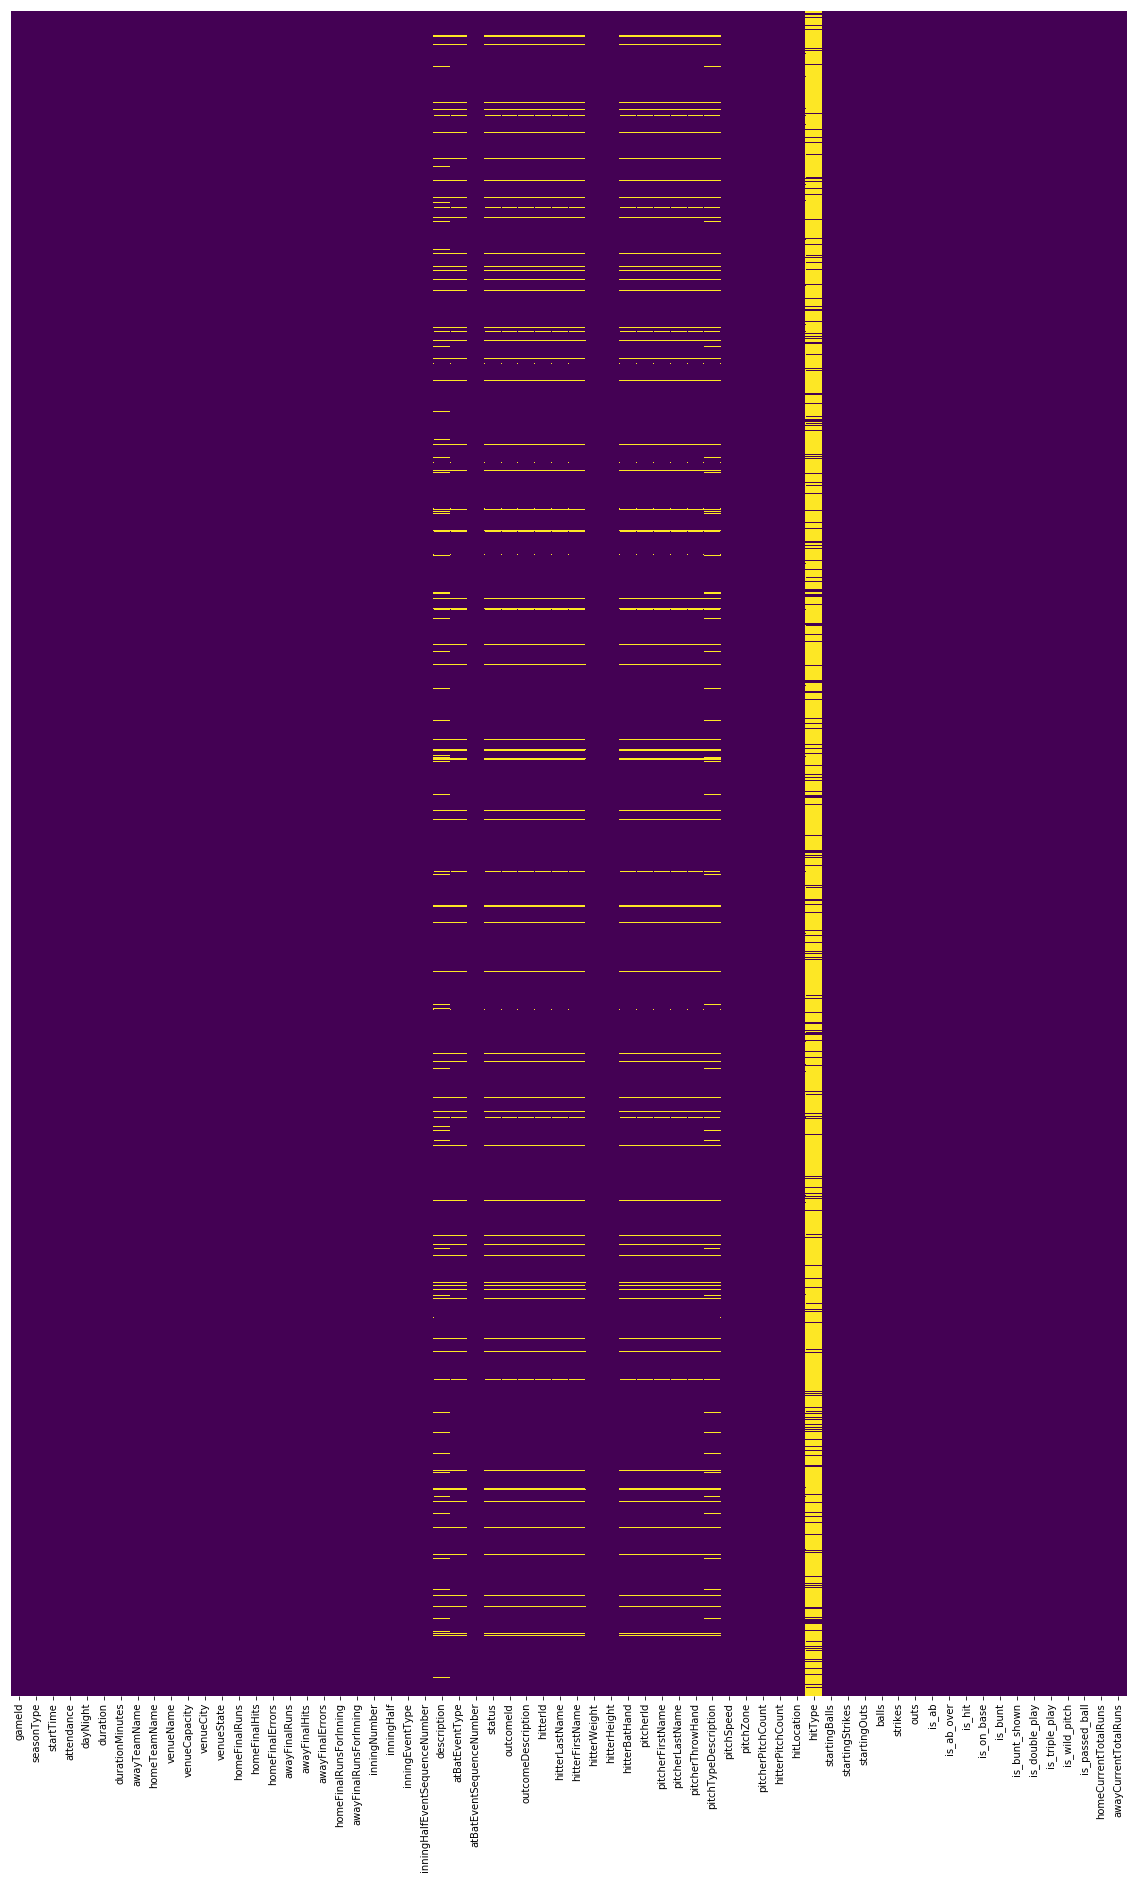

In [83]:
# Data Before Cleaning

plt.figure(figsize=(20, 31))
sns.heatmap(cubs_reg_post_sub_sort_df.isnull(), yticklabels=False, cbar = False,  cmap ='viridis')

In [84]:
# Remove unused rows - LINEUP
cubs_reg_post_sub_sort_df = cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['inningEventType'] != 'LINEUP'] 

# Remove unused rows - STEALS
cubs_reg_post_sub_sort_df = cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['atBatEventType'] != 'STEAL'] 


## New Features

This is where we make the Cubs specific columns

In [85]:
# def home(x):
#     if x == 'Cubs':
#         return 'H'
#     return 'A'

# def opponent(h, a):
#     if h != 'Cubs':
#         return h
#     return a

# def scoreCubs(h, hf, af):
#     if h == 'H':
#         return hf
#     elif h == 'A':
#         return af
    
# def scoreOppo(h, hf, af):
#     if h == 'H':
#         return af
#     elif h == 'A':
#         return hf

# def hitsCubs(h, hf, af):
#     if h == 'H':
#         return hf
#     elif h == 'A':
#         return af

# def hitsOppo(h, hf, af):
#     if h == 'H':
#         return af
#     elif h == 'A':
#         return hf
    
# def errCubs(h, hf, af):
#     if h == 'H':
#         return hf
#     elif h == 'A':
#         return af

# def errOppo(h, hf, af):
#     if h == 'H':
#         return af
#     elif h == 'A':
#         return hf

In [86]:
def home(x):
    if x == 'Cubs':
        return 'H'
    return 'A'

def opponent(h, a):
    if h != 'Cubs':
        return h
    return a

def Cubs(h, hf, af):
    if h == 'H':
        return hf
    elif h == 'A':
        return af
    
def Oppo(h, hf, af):
    if h == 'H':
        return af
    elif h == 'A':
        return hf
    
def WinLoss(h, hf, af):
    if h == 'H':
        if hf > af:
            return 'Wins'
        else:
            return 'Losses'
    elif h == 'A':
        if hf < af:
            return 'Wins'
        else:
            return 'Losses'
        
def Hit(ht):
    if ht != 'NOHIT':
        return 1
    else:
        return 0

In [87]:
cubs_reg_post_sub_sort_df['HomeAway'] = cubs_reg_post_sub_sort_df['homeTeamName'].apply(home)


cubs_reg_post_sub_sort_df['Opponent'] = cubs_reg_post_sub_sort_df.apply(
                                        lambda row: opponent(row['homeTeamName'], 
                                                             row['awayTeamName']), axis =1)
cubs_reg_post_sub_sort_df['CubsFinalRuns']= cubs_reg_post_sub_sort_df.apply( lambda row: Cubs(row['HomeAway'], 
                                                                                                row['homeFinalRuns']
                                                                                                ,row['awayFinalRuns']), 
                                                                            axis =1)
cubs_reg_post_sub_sort_df['OpponentFinalRuns']=cubs_reg_post_sub_sort_df.apply( lambda row: Oppo(row['HomeAway'], 
                                                                                              row['homeFinalRuns']
                                                                                              ,row['awayFinalRuns']),
                                                                                 axis =1)
cubs_reg_post_sub_sort_df['CubsFinalHits'] = cubs_reg_post_sub_sort_df.apply( lambda row: Cubs(row['HomeAway'], 
                                                                                               row['homeFinalHits']
                                                                                              ,row['awayFinalHits']), 
                                                                              axis =1)
cubs_reg_post_sub_sort_df['OpponentFinalHits'] = cubs_reg_post_sub_sort_df.apply( lambda row: Oppo(row['HomeAway'], 
                                                                                                   row['homeFinalHits']
                                                                                              ,row['awayFinalHits']), 
                                                                                  axis =1)
cubs_reg_post_sub_sort_df['CubsFinalErrors'] = cubs_reg_post_sub_sort_df.apply( lambda row: Cubs(row['HomeAway'], 
                                                                                               row['homeFinalErrors']
                                                                                              ,row['awayFinalErrors']), 
                                                                                axis =1)
cubs_reg_post_sub_sort_df['OpponentFinalErrors'] = cubs_reg_post_sub_sort_df.apply( lambda row: Oppo(row['HomeAway'], 
                                                                                                row['homeFinalErrors']
                                                                                                ,row['awayFinalErrors']), 
                                                                                     axis =1)

In [88]:
cubs_reg_post_sub_sort_df['CubsWinLoss'] = cubs_reg_post_sub_sort_df.apply( lambda row: WinLoss(row['HomeAway'], 
                                                                                                row['homeFinalRuns']
                                                                                                ,row['awayFinalRuns']), 
                                                                                     axis =1)

In [89]:
#Handle null values for Description

cubs_reg_post_sub_sort_df['description'] = cubs_reg_post_sub_sort_df['description'].fillna('No Description')

In [90]:
#Handle null values for hitType

cubs_reg_post_sub_sort_df['hitType'] = cubs_reg_post_sub_sort_df['hitType'].fillna('NOHIT')

In [91]:
cubs_reg_post_sub_sort_df['Hit'] = cubs_reg_post_sub_sort_df.apply( lambda row: Hit(row['hitType']) ,
                                                                                     axis =1)

In [92]:
#cubs_reg_post_sub_sort_df[cubs_reg_post_sub_sort_df['gameId'] == '0024139e-3dde-481b-92f5-a29af99d5ea3']

In [93]:
#cubs_reg_post_sub_sort_df[['gameId','inningNumber','inningHalf','inningHalfEventSequenceNumber',
#                                 'hitterId','atBatEventSequenceNumber', 'outcomeDescription']].head(292)

In [94]:
## Final Dataset to be used below
cubs_df = cubs_reg_post_sub_sort_df

#cubs_reg_post_df = cubs_reg_post_sub_sort_df
#cubs_reg_post_sub_df = cubs_reg_post_sub_sort_df

In [95]:
#cubs_df.description.isnull().head()
cubs_df.hitType.value_counts()

NOHIT    44400
GB        3230
LD        1644
FB        1566
PU         599
Name: hitType, dtype: int64

In [96]:
hittypes =['GB' , 'LD' , 'FB' , 'PU']

cubs_df[(cubs_df['hitType'].isin(hittypes))]['hitType']

7407    FB
7883    FB
2690    GB
2256    GB
7341    GB
7390    FB
7816    PU
7329    LD
7829    LD
7841    GB
7839    LD
7347    GB
7348    GB
7342    GB
7383    GB
2273    GB
7889    LD
2705    LD
2252    LD
7355    GB
2282    GB
2706    GB
7878    GB
2286    LD
7375    GB
2701    FB
7404    GB
2687    FB
7357    LD
2245    GB
        ..
1568    GB
1544    GB
1559    GB
1554    LD
1598    LD
1549    GB
1558    FB
1579    GB
1571    GB
1613    LD
1618    LD
1562    FB
1589    GB
1452    LD
1480    GB
1380    LD
1477    PU
1378    GB
1422    GB
1414    GB
1490    GB
1433    FB
1496    GB
1441    GB
1325    GB
1357    LD
1319    GB
1317    GB
1335    GB
1341    GB
Name: hitType, Length: 7039, dtype: object

In [97]:
cubs_df.Hit.value_counts()

0    44400
1     7039
Name: Hit, dtype: int64

## Simple Statistics

In [76]:
# This code creates a button for the reader to toggle the analysis with or without the code

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

### Chicago Cubs -  Season Overview

To better understand how the Chicago Cubs performed during the 2016 season, please see the table below. The Chicago Cubs played a total of 172 games combined in the Regular Season and Post Season (Playoffs). In the regular season, the Chicago Cubs were able to win 103 games out of 162 (63% ratio win over lossses) which made them qualified to the playoffs. 

In the Post Season, the Chicago Cubs played the first round of NLCS (National League Championship Series) games against the Dodgers (Los Angeles). In this first round, the team that wins 4 games out of 7, wins. The Chicago Cubs won 4 games and lost 2 games against the Dodgers which made them qualified to the World Series. 


After the Cubs beat the Dodgers in the NLCS (National League Championship Series), the Chicago Cubs qualified to play in the World Series against the Indians (Cleveland). At some point in this set of games, the Indians were winning 3 games to 1, with only one game left to win the World Series. In one big turnaround of eventes, the Chicago Cubs won three games in a row and won the 2016 World Series.

In [98]:
# Creating a dataframe to provide a count by SeasonType and Wins and Losses. Since the large dataframe contains records by play, the code below needed to eliminate any duplicates to provide an accurate count

cubs_df[['gameId','CubsWinLoss','seasonType']].drop_duplicates().groupby(['seasonType','CubsWinLoss']).count()

gameId
seasonType CubsWinLoss        
PST        Losses            3
           Wins              7
REG        Losses           59
           Wins            103

The Chicago Cubs played had Away (A) and Home (H) games, the table below shows the breakdown by season and the the count of games.

In [198]:
cubs_df[['gameId','HomeAway','seasonType']].drop_duplicates().groupby(['HomeAway','seasonType']).count()

gameId
HomeAway seasonType        
A        PST              5
         REG             81
H        PST              5
         REG             81

### Player Statistics

### Supplemental Statistics - Stadium Capacity and Game Attendance

The overall attendance to the 2016 Cubs season games ranged from 16,497 to 54,449. This including the range of all games disrespective if it was a game in the regular season versus post season. The average attendance of 37,983 people in the games and a median 40,791. The tabe below shows the different overall statistics for attendance.

The Stadium or Venue Capacity the Cubs played in the 2016 season ranged from 36,742 to 56,000 occupancy. The median capacity on the stadiums is of 41,072.

In [182]:
cubs_df[['venueCapacity','attendance']].describe()

venueCapacity    attendance
count   51439.000000  51439.000000
mean    42179.531834  37983.162678
std      3579.346373   6773.974140
min     36742.000000  16497.000000
25%     41072.000000  34508.000000
50%     41072.000000  40791.000000
75%     42302.000000  41507.000000
max     56000.000000  54449.000000

In [183]:
cubs_df.describe()

attendance  durationMinutes  venueCapacity  homeFinalRuns  \
count  51439.000000     51439.000000   51439.000000   51439.000000   
mean   37983.162678       190.453372   42179.531834       4.408639   
std     6773.974140        33.571362    3579.346373       2.992514   
min    16497.000000        75.000000   36742.000000       0.000000   
25%    34508.000000       170.000000   41072.000000       2.000000   
50%    40791.000000       184.000000   41072.000000       4.000000   
75%    41507.000000       200.000000   42302.000000       6.000000   
max    54449.000000       303.000000   56000.000000      14.000000   

       homeFinalHits  homeFinalErrors  awayFinalRuns  awayFinalHits  \
count   51439.000000     51439.000000   51439.000000   51439.000000   
mean        7.938490         0.647155       4.257917       8.108322   
std         3.364894         0.833602       3.153237       3.524623   
min         0.000000         0.000000       0.000000       1.000000   
25%         6.000000         0.000000       2.000000       6.000000   
50%         8.000000         0.000000       4.000000       8.000000   
75%        10.000000         1.000000       6.000000      10.000000   
max        22.000000         4.000000      16.000000      18.000000   

       awayFinalErrors  homeFinalRunsForInning      ...       is_passed_ball  \
count     51439.000000            51439.000000      ...         51439.000000   
mean          0.604988                0.602461      ...             0.000505   
std           0.805744                1.104847      ...             0.022477   
min           0.000000                0.000000      ...             0.000000   
25%           0.000000                0.000000      ...             0.000000   
50%           0.000000                0.000000      ...             0.000000   
75%           1.000000                1.000000      ...             0.000000   
max           4.000000                7.000000      ...             1.000000   

       homeCurrentTotalRuns  awayCurrentTotalRuns  CubsFinalRuns  \
count          51439.000000          51439.000000   51439.000000   
mean               2.123000              2.121017       5.131573   
std                2.511441              2.490144       3.078933   
min                0.000000              0.000000       0.000000   
25%                0.000000              0.000000       3.000000   
50%                1.000000              1.000000       5.000000   
75%                3.000000              3.000000       7.000000   
max               14.000000             16.000000      16.000000   

       OpponentFinalRuns  CubsFinalHits  OpponentFinalHits  CubsFinalErrors  \
count       51439.000000   51439.000000       51439.000000     51439.000000   
mean            3.534983       8.873831           7.172982         0.664146   
std             2.855696       3.486626           3.186984         0.894268   
min             0.000000       1.000000           0.000000         0.000000   
25%             1.000000       7.000000           5.000000         0.000000   
50%             3.000000       9.000000           7.000000         0.000000   
75%             5.000000      11.000000           9.000000         1.000000   
max            14.000000      18.000000          22.000000         4.000000   

       OpponentFinalErrors           Hit  
count         51439.000000  51439.000000  
mean              0.587997      0.136842  
std               0.736471      0.343683  
min               0.000000      0.000000  
25%               0.000000      0.000000  
50%               0.000000      0.000000  
75%               1.000000      0.000000  
max               4.000000      1.000000  

[8 rows x 46 columns]

## Visualize Attributes

### Games

### Attendance by Season

The boxplot below comprares the game attendance by Post Season and Regular Season. The results show there is greater attendance in the Post Season than in the Regular Season. Notice that in the playoffs, the lowest attendance is 42,148 and the maximum attendace is 54,449. In the regular season has more attendance, with a minimum of 16,497 and a maximum attendance of 42,148

In [189]:
df.groupby(['seasonType'])['attendance'].describe()

count          mean          std      min       25%      50%  \
seasonType                                                                 
PST          10.0  46159.000000  5695.531835  42148.0  42384.50  42779.0   
REG         162.0  37479.376543  6563.293828  16497.0  34329.75  40528.5   

                 75%      max  
seasonType                     
PST         51594.50  54449.0  
REG         41391.25  49522.0

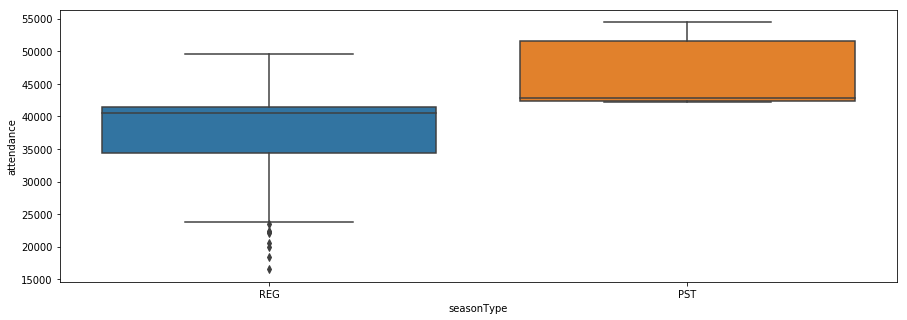

In [106]:
plt.figure(figsize=(15,5))
sns.boxplot(data =df ,x = 'seasonType', y = 'attendance' )

## Explore Joint Attributes

## Players

In [162]:
df = cubs_df[['gameId','CubsWinLoss','seasonType','attendance']].drop_duplicates()

#.groupby(['seasonType','CubsWinLoss']).count()

In [108]:
hitter = cubs_df[['hitterLastName','hitterWeight','hitterHeight']].drop_duplicates()

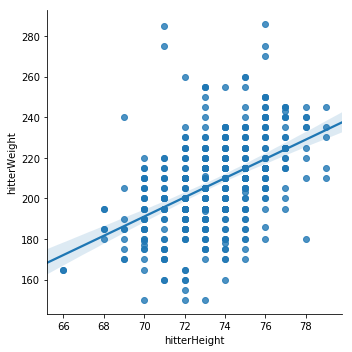

In [109]:
sns.lmplot(x='hitterHeight', y='hitterWeight', data = hitter ) #hue ='hitterLastName'

In [111]:
g = cubs_df[['gameId','CubsWinLoss']].groupby('gameId')

## Appendix

## Data Cleansing

The heatmap below shows there are no blank values in the dataset. Otherwise, it would show yellow figures on any values.

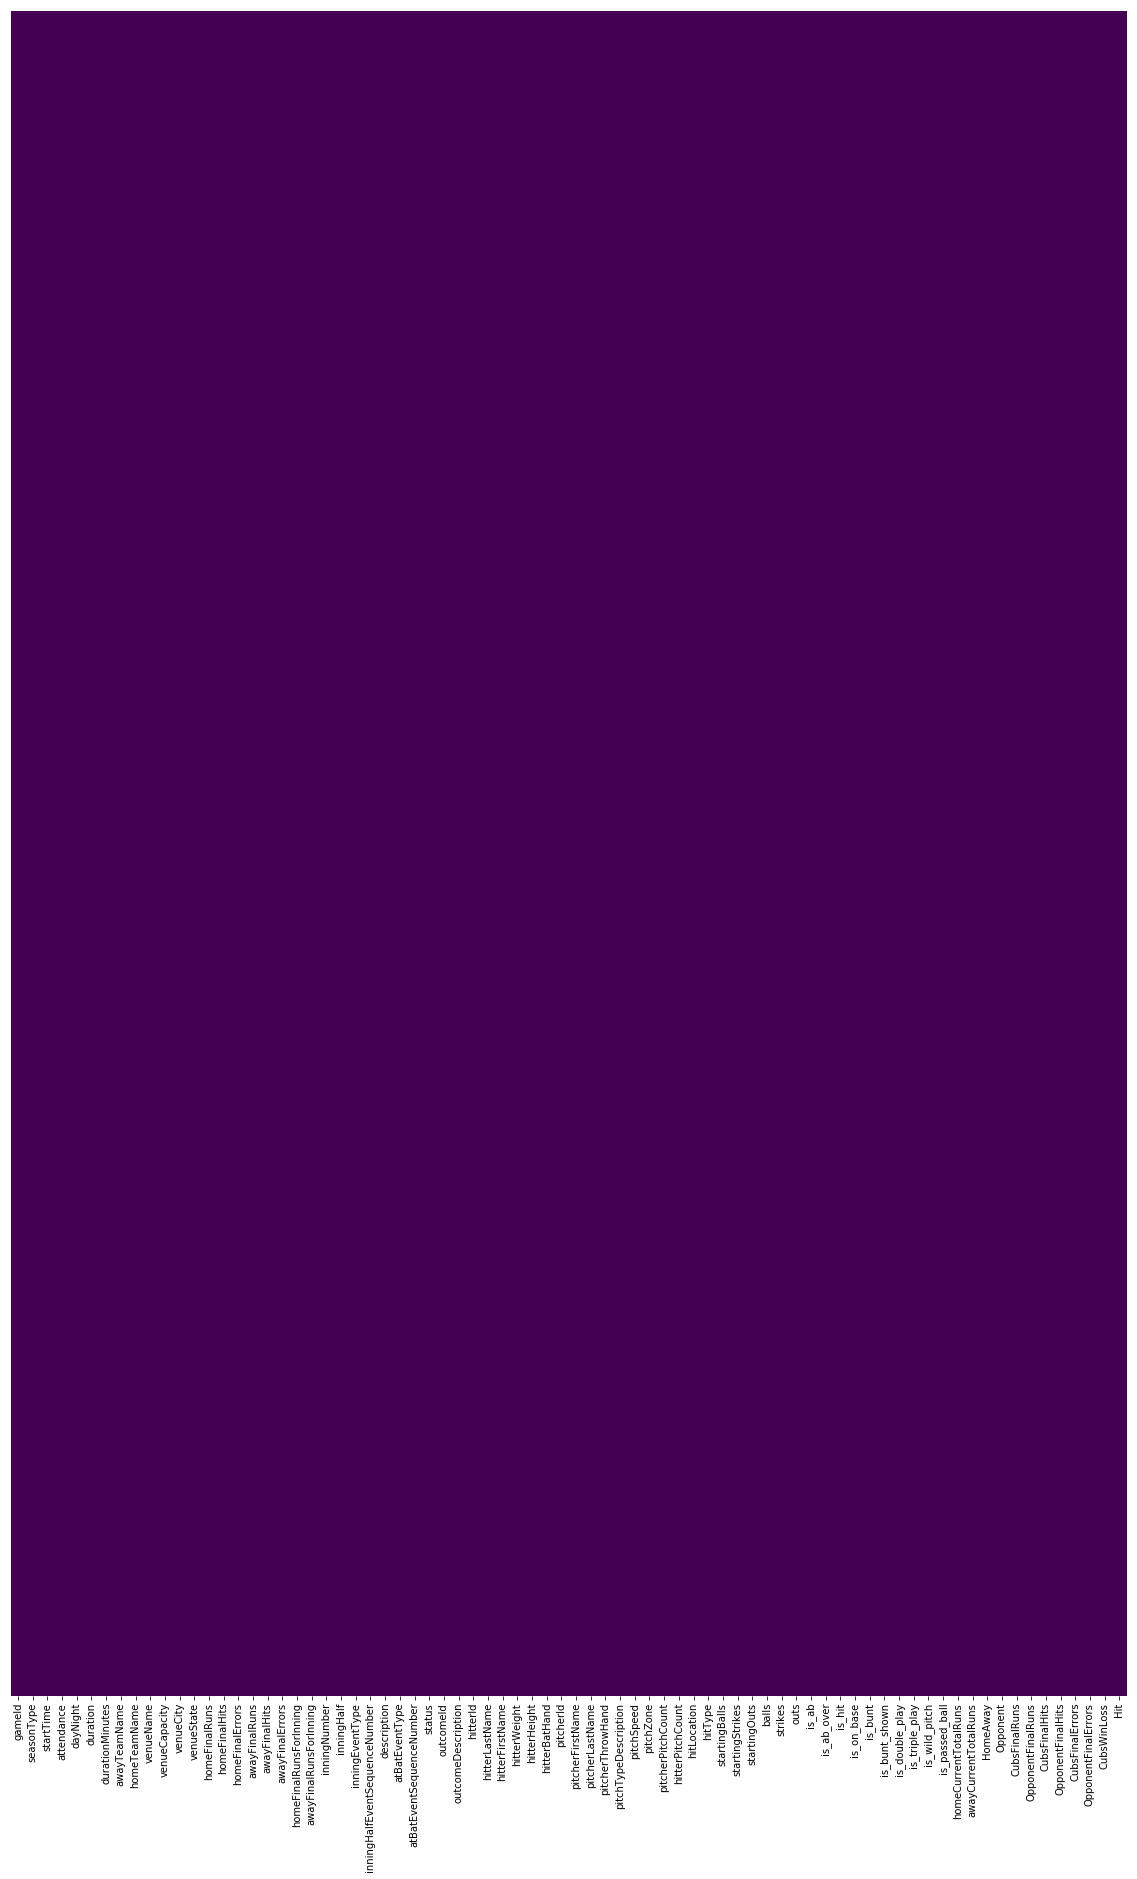

In [120]:
# Heamap showing there are no blank spaces. Yellow lines woud appear to show any null values

plt.figure(figsize=(20, 31))
sns.heatmap(cubs_df.isnull(), yticklabels=False, cbar = False,  cmap ='viridis')

In [118]:
cubs_df['HomeAway'].value_counts()

A    26000
H    25439
Name: HomeAway, dtype: int64

In [119]:
cubs_df.pitchZone.head()

7364    11
2689     6
7407     8
7883     8
2697     6
Name: pitchZone, dtype: int64

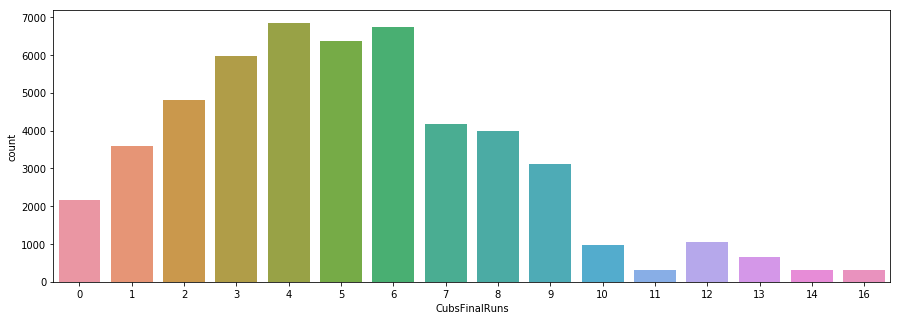

In [121]:
plt.figure(figsize=(15,5))
sns.countplot(x=cubs_df['CubsFinalRuns'])

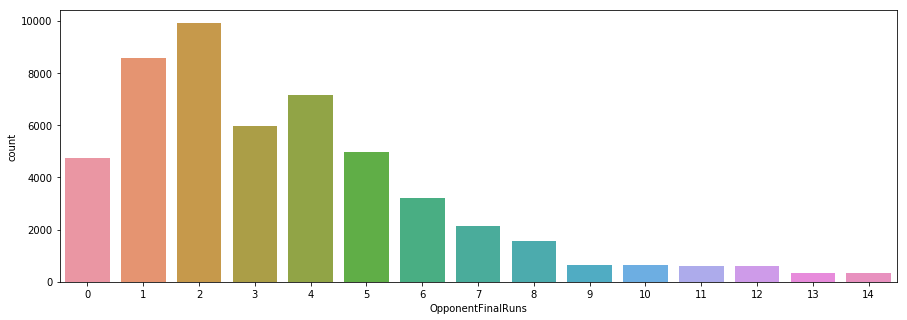

In [122]:
plt.figure(figsize=(15,5))
sns.countplot(x=cubs_df['OpponentFinalRuns'])

In [123]:
cubs_df[['HomeAway','homeTeamName','awayTeamName','Opponent','homeFinalRuns','awayFinalRuns'
                          ,'CubsFinalRuns','OpponentFinalRuns','homeFinalHits','awayFinalHits','CubsFinalHits'
                          ,'OpponentFinalHits','homeFinalErrors','awayFinalErrors','CubsFinalErrors','OpponentFinalErrors']].head(20000)

HomeAway homeTeamName awayTeamName Opponent  homeFinalRuns  \
7364         H         Cubs      Pirates  Pirates              4   
2689         H         Cubs      Pirates  Pirates              4   
7407         H         Cubs      Pirates  Pirates              4   
7883         H         Cubs      Pirates  Pirates              4   
2697         H         Cubs      Pirates  Pirates              4   
7371         H         Cubs      Pirates  Pirates              4   
2255         H         Cubs      Pirates  Pirates              4   
2278         H         Cubs      Pirates  Pirates              4   
7845         H         Cubs      Pirates  Pirates              4   
7884         H         Cubs      Pirates  Pirates              4   
2279         H         Cubs      Pirates  Pirates              4   
7315         H         Cubs      Pirates  Pirates              4   
7365         H         Cubs      Pirates  Pirates              4   
7328         H         Cubs      Pirates  Pirates              4   
2280         H         Cubs      Pirates  Pirates              4   
7389         H         Cubs      Pirates  Pirates              4   
7351         H         Cubs      Pirates  Pirates              4   
7372         H         Cubs      Pirates  Pirates              4   
7395         H         Cubs      Pirates  Pirates              4   
7340         H         Cubs      Pirates  Pirates              4   
7850         H         Cubs      Pirates  Pirates              4   
7856         H         Cubs      Pirates  Pirates              4   
7837         H         Cubs      Pirates  Pirates              4   
2690         H         Cubs      Pirates  Pirates              4   
7352         H         Cubs      Pirates  Pirates              4   
7408         H         Cubs      Pirates  Pirates              4   
7297         H         Cubs      Pirates  Pirates              4   
2269         H         Cubs      Pirates  Pirates              4   
2292         H         Cubs      Pirates  Pirates              4   
2256         H         Cubs      Pirates  Pirates              4   
...        ...          ...          ...      ...            ...   
10115        A      Pirates         Cubs  Pirates              8   
11694        A      Pirates         Cubs  Pirates              8   
11777        A      Pirates         Cubs  Pirates              8   
11728        A      Pirates         Cubs  Pirates              8   
11512        A      Pirates         Cubs  Pirates              8   
11761        A      Pirates         Cubs  Pirates              8   
10153        A      Pirates         Cubs  Pirates              8   
10142        A      Pirates         Cubs  Pirates              8   
4379         A      Pirates         Cubs  Pirates              8   
4374         A      Pirates         Cubs  Pirates              8   
4354         A      Pirates         Cubs  Pirates              8   
4380         A      Pirates         Cubs  Pirates              8   
4360         A      Pirates         Cubs  Pirates              8   
4375         A      Pirates         Cubs  Pirates              8   
4357         A      Pirates         Cubs  Pirates              8   
11509        A      Pirates         Cubs  Pirates              8   
11554        A      Pirates         Cubs  Pirates              8   
4369         A      Pirates         Cubs  Pirates              8   
4386         A      Pirates         Cubs  Pirates              8   
11541        A      Pirates         Cubs  Pirates              8   
4389         A      Pirates         Cubs  Pirates              8   
11716        A      Pirates         Cubs  Pirates              8   
4365         A      Pirates         Cubs  Pirates              8   
4387         A      Pirates         Cubs  Pirates              8   
11762        A      Pirates         Cubs  Pirates              8   
11667        A      Pirates         Cubs  Pirates              8   
11488        A      Pirates         Cubs  Pirates             

In [124]:
#cubs_df.info()

In [125]:
cubs_df['hitType'].value_counts()

NOHIT    44400
GB        3230
LD        1644
FB        1566
PU         599
Name: hitType, dtype: int64

In [126]:
cubs_df['pitchTypeDescription'].value_counts()

Fastball            23725
Slider               7161
Sinker               5843
Curveball            5843
Changeup             5143
Cutter               3150
Splitter              272
Intentional Ball      225
Other                  67
Pitchout               10
Name: pitchTypeDescription, dtype: int64

In [127]:
#cubs_df['description'].value_counts()

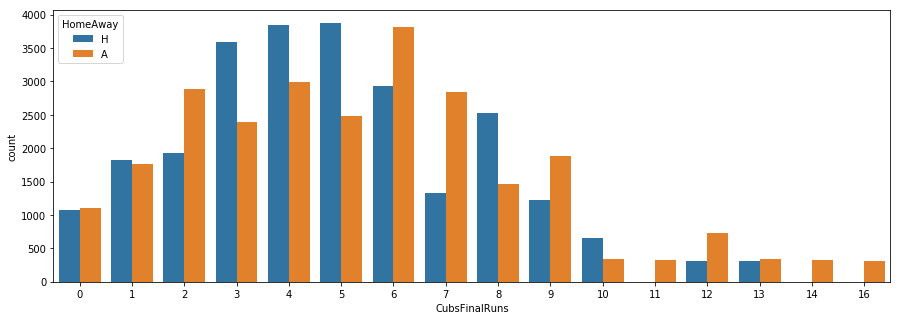

In [128]:
plt.figure(figsize=(15,5))
sns.countplot(x=cubs_df['CubsFinalRuns'], hue = cubs_df['HomeAway'])

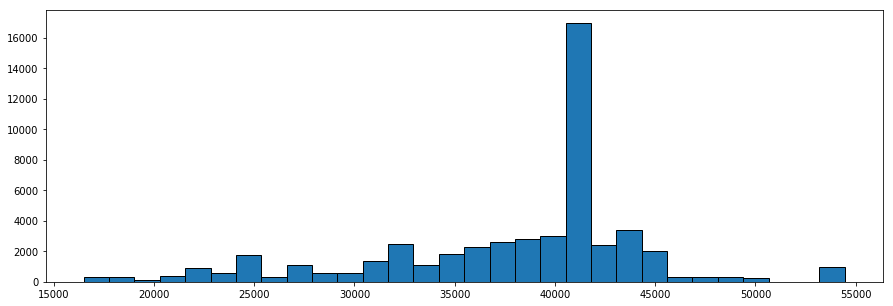

In [129]:
plt.figure(figsize=(15,5))
plt.hist(cubs_df['attendance'],bins = 30, ec='black')
plt.show()

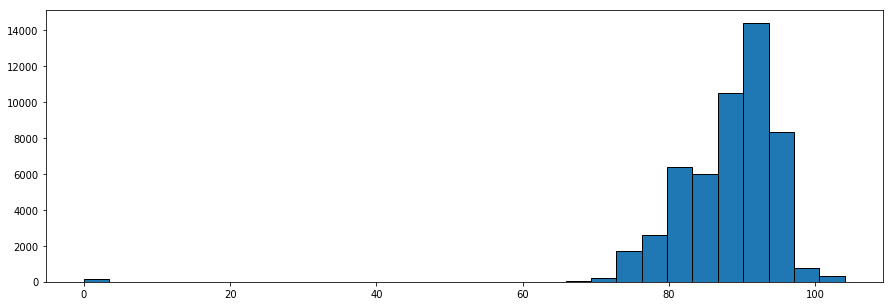

In [130]:
plt.figure(figsize=(15,5))
plt.hist(cubs_df['pitchSpeed'],bins = 30, ec='black')
plt.show()

In [131]:
#Histogram
#cubs_df['pitchSpeed'].iplot(kind='hist',bins=25)
wl['gameId'].iplot(kind='hist',bins=25)

In [132]:
#Histogram
cubs_df['hitterWeight'].iplot(kind='hist',bins=25, color ='red', title = 'Hitter Weight')
cubs_df['hitterHeight'].iplot(kind='hist',bins=25, color='blue', title = 'Hitter Height')

In [133]:
#Scatter Plot
#cubs_df[['OpponentFinalRuns','CubsFinalRuns','OpponentFinalHits','CubsFinalHits']].scatter_matrix()

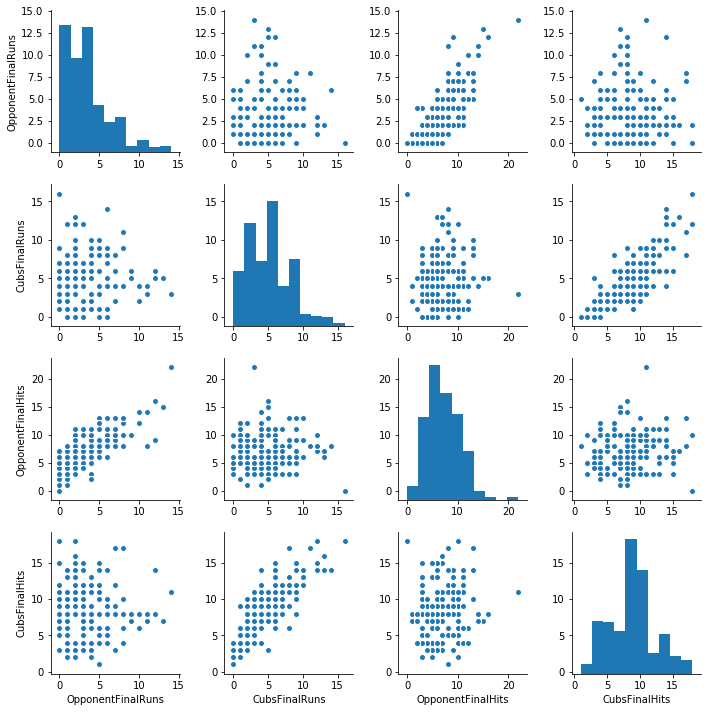

In [134]:
sns.pairplot(cubs_df[['OpponentFinalRuns','CubsFinalRuns','OpponentFinalHits','CubsFinalHits']], palette = 'coolwarm' )

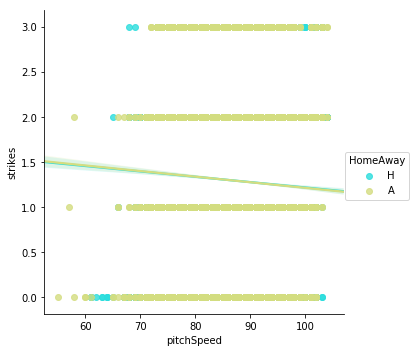

In [135]:
plt.figure(figsize=(15,5))
sns.lmplot(data =cubs_df[cubs_df['pitchSpeed'] !=0] , x = 'pitchSpeed', y = 'strikes', hue = 'HomeAway', palette= 'rainbow')

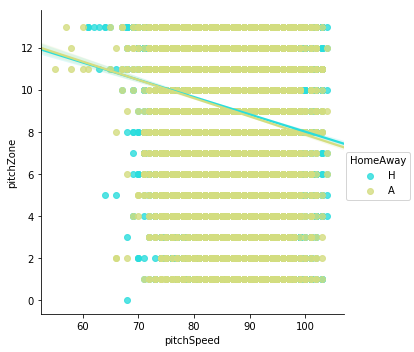

In [136]:
plt.figure(figsize=(15,5))
sns.lmplot(data =cubs_df[cubs_df['pitchSpeed'] !=0] , x = 'pitchSpeed', y = 'pitchZone', hue = 'HomeAway', palette= 'rainbow')

In [137]:
cubs_df.pitchSpeed.value_counts()

92     5291
93     4950
91     4153
94     3665
90     3122
89     2725
88     2496
95     2354
87     2165
85     2036
83     2025
84     2008
86     1967
82     1586
81     1444
96     1404
80     1335
79     1033
97      883
78      830
77      746
76      674
75      461
98      426
74      368
73      222
99      193
0       148
100     127
101     120
72      112
102     105
71       74
103      62
70       39
69       22
68       22
104      11
67        9
66        6
65        4
61        4
64        3
60        2
58        2
63        2
62        1
57        1
55        1
Name: pitchSpeed, dtype: int64

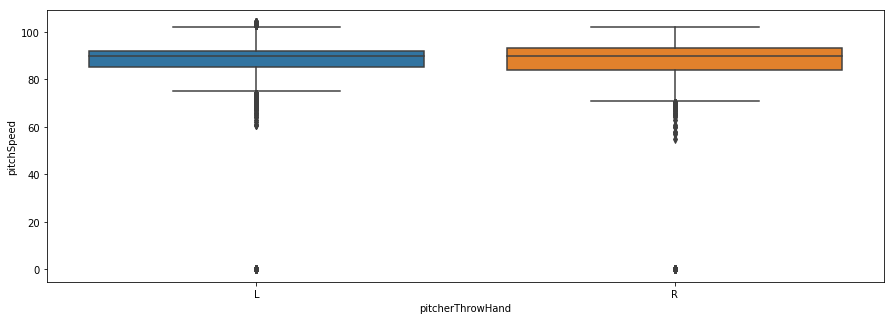

In [138]:
plt.figure(figsize=(15,5))
sns.boxplot(data =cubs_df ,x = 'pitcherThrowHand', y = 'pitchSpeed' )

In [139]:
#Box Plot

cubs_df[['pitchSpeed']].iplot(kind='box', x = 'pitcherThrowHand',y= 'pitchSpeed')

In [140]:
cubs_df[(cubs_df['homeTeamName']=='Cubs') & (cubs_df['strikes']==3)].iplot(kind='bar',x='pitcherLastName',y='strikes')

In [141]:
#Spread Plot

cubs_df[['CubsFinalRuns','CubsFinalHits']].iplot(kind='spread')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [142]:
#Scatter

cubs_df.iplot(kind='scatter',x='CubsFinalRuns',y='OpponentFinalRuns',mode='markers',size=10)

In [143]:
# 3d surface plot

#df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
#cubs_df[['venueCapacity','attendance','duration']].iplot(kind='surface',colorscale='rdylbu')


In [144]:
#Bubble

#cubs_df.iplot(kind='bubble',x='pitchZone',y='pitchSpeed',size='pitcherPitchCount')


## Data Quality

To be deleted - Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

## Simple Statistics

To be deleted - Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

## Visualize Attributes

To be deleted - Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

## Explore Joint Attributes

To be deleted - Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

## Explore Attributes and Class

To be deleted - Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

## Exceptional Work

To be deleted - You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.